# Regularization Methods in Linear Regression

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('datasets/Height_Weight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


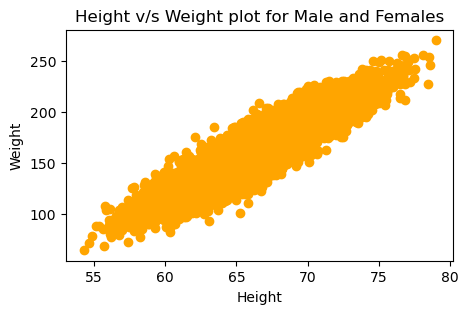

In [3]:
# Plot the data
plt.figure(figsize=(5,3))
plt.scatter(df['Height'], df['Weight'], color='orange')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for Male and Females');

# Take sample of the data and plot

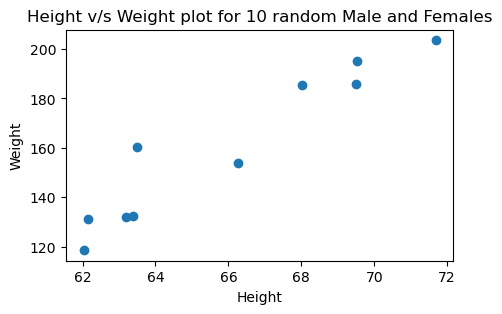

In [4]:
plt.figure(figsize=(5,3))
s_df = df.sample(n=10, random_state=11) 
plt.scatter(s_df['Height'], s_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for 10 random Male and Females');

# Split into Train and Test sets¶

In [5]:
train, test = train_test_split(s_df, test_size=0.3, random_state=11)
train = train.sort_values('Height')
test = test.sort_values('Height')

# predictors
xtrain = train['Height'].to_frame()
xtest  = test['Height'].to_frame()

# output
ytrain = train['Weight']
ytest  = test['Weight']

In [6]:
lr = LinearRegression().fit(xtrain, ytrain)

The `score method` calculates the coefficient of determination, or R-squared, which is a statistical measure that indicates how well the linear regression model fits the training data. The R-squared value ranges from 0 to 1, where 1 represents a perfect fit and 0 represents no fit.

In [7]:
# the score is actually coefficient of determination R^2
lr.score(xtrain, ytrain)

0.8159718383194039

In [8]:
lr.coef_ , lr.intercept_

(array([7.77384594]), -351.91741225786865)

In [9]:
### Model Equation will be =====> Weight = 7.7xHeight + (-351.91)

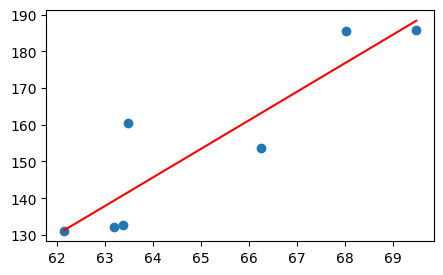

In [10]:
plt.figure(figsize=(5,3))

plt.scatter(xtrain, ytrain)
ypred = lr.predict(xtrain)
plt.plot(xtrain, ypred,color='red');

Through this graph, we are able to capture the trend in this sample but if we want to know about the significance of coefficient that we had, we have to perform statistical test bcoz the model(LinearRegression() or else) itself will not tell about significance of the coefficient(slope).    

## Hypothesis Test - Check Significance of coefficients, 
### Here β0 and β1 only as per this problem

In [11]:
# H0, null hypothesis is considered which says that coefficients are insignificant,
# i.e., essentially they are zero
# H1, alternative hypthesis is considered which says that coefficients are significant,
# i.e., essentially they are non-zero.
# It is a two way hypothesis

import statsmodels.api as sm
X = sm.add_constant(xtrain)     # Adding constant to the input data xtrain
X


,const,Height
5857,1.0,62.149296
6353,1.0,63.182618
9821,1.0,63.382801
5129,1.0,63.493143
6011,1.0,66.261527
1703,1.0,68.024569
3104,1.0,69.491523


In [12]:
model = sm.OLS(ytrain, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     22.17
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00530
Time:                        11:39:21   Log-Likelihood:                -25.747
No. Observations:                   7   AIC:                             55.49
Df Residuals:                       5   BIC:                             55.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -351.9174    107.635     -3.270      0.0

/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Conclusion**

- P>|t| = 0.005. At 5% significance level, alpha (alpha is also your probability) is set at 0.05. As p-value is less than alpha, which indicates that probability of obtaining an extreme value lower than 0.05 is extremely low and you have already obtained a low value, so, null hypothesis can be rejected. That is to say that the coefficiencts are significant and they are non-zero in value. 

-  Since both coefficients (const  -351.9174 and Height 7.7738 have p value of 0.022 and 0.005 which is lower that 0.05 hence null/Ho must go i.e. both coefficients are significant.

### What happens in case p > 0.05?

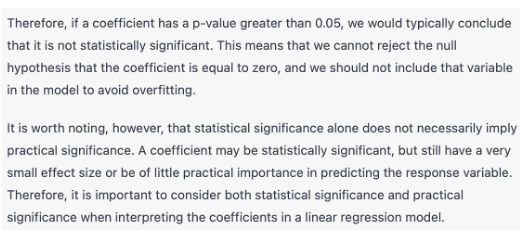

## Statistical vs Practical Significance

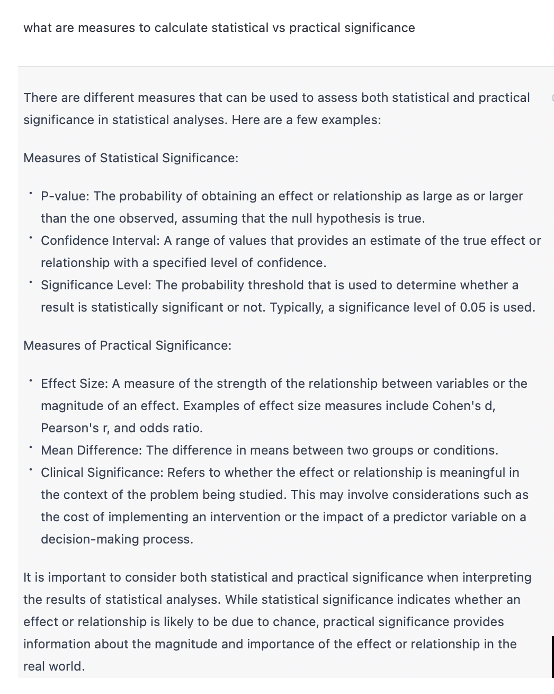

# Ridge Regression

**Case 1 - Tuning parameter/alpha/lambda is 0**

Means Regularization term or penalty term becomes 0 & it is simple linear regression.

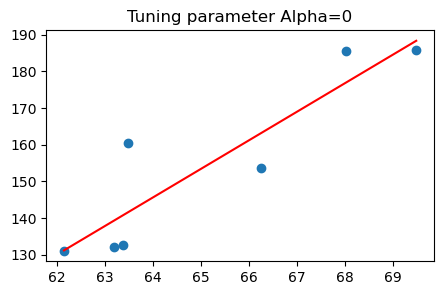

In [13]:
plt.figure(figsize=(5,3))

from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=0).fit(xtrain, ytrain) # alpha=0 is plain linear regression,
plt.scatter(xtrain, ytrain)                # i.e., no regularization
ypred = model.predict(xtrain)    
plt.plot(xtrain, ypred,color='red')
plt.title('Tuning parameter Alpha=0')
plt.show()


**Case 2 - Tuning parameter/alpha/lambda is 10**

Means Regularization term or penalty term has a role in regularizing coefficient values.

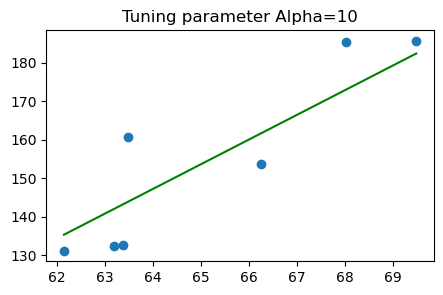

In [14]:
plt.figure(figsize=(5,3))

model1 = Ridge(alpha=10).fit(xtrain, ytrain) # alpha=10 implies regularization 
plt.scatter(xtrain, ytrain)                 # is performed on the coefficient estimates
ypred1 = model1.predict(xtrain)    
plt.plot(xtrain, ypred1,color='green')
plt.title('Tuning parameter Alpha=10')

plt.show()


<font color=blue> It has reduced the slope of coef which we are estimating

**Case 3 - Tuning parameter/alpha/lambda is 100**

Means more Regularization as tuning parameter is increased, hence more regularized coefficients with lower values i.e. flatter slopes.

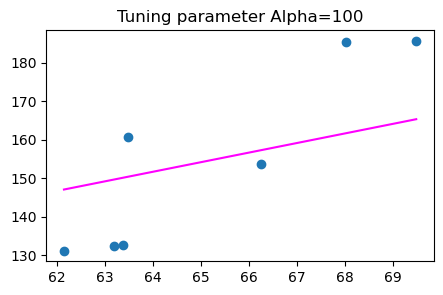

In [15]:
plt.figure(figsize=(5,3))

model2 = Ridge(alpha=100).fit(xtrain, ytrain) 
# alpha=100 implies regularization is performed on the coefficient estimates
# the model becomes less flexible with lower variance. 
# Essentially, the slope of estimated coefficients is reduced
plt.scatter(xtrain, ytrain)
ypred2 = model2.predict(xtrain)    
plt.plot(xtrain, ypred2,color='magenta')
plt.title('Tuning parameter Alpha=100')
plt.show()


<font color=blue> It has further reduced the slope of coef with increase in alpha value

## Checking effects of regularization by choosing various alpha values

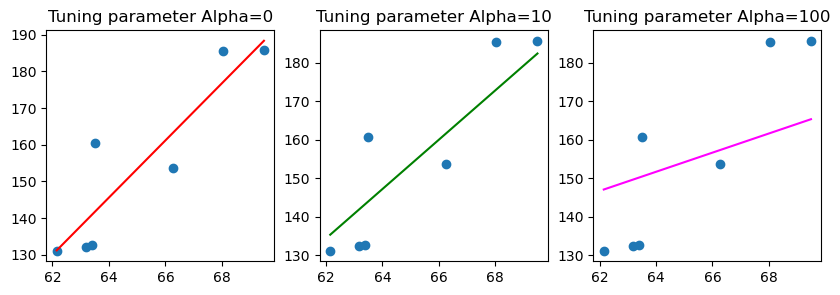

In [16]:
plt.figure(figsize=(10,3))

plt.subplot(131) # meaning 1*3 grid i.e 1 row & 3 col's, so 2 plots possible, this is 1st

plt.scatter(xtrain, ytrain)                # i.e., no regularization
plt.plot(xtrain, ypred,color='red')
plt.title('Tuning parameter Alpha=0')

plt.subplot(132) # meaning 1*3 grid i.e 1 row & 3 col's, so 2 plots possible, this is 2nd

plt.scatter(xtrain, ytrain)                 # is performed on the coefficient estimates
plt.plot(xtrain, ypred1,color='green')
plt.title('Tuning parameter Alpha=10')


plt.subplot(133) # meaning 1*3 grid i.e 1 row & 3 col's, so 2 plots possible, this is 3rd

plt.scatter(xtrain, ytrain)                 # is performed on the coefficient estimates
plt.plot(xtrain, ypred2,color='magenta')
plt.title('Tuning parameter Alpha=100');


- These regularization methods r being talked about in a case when linear regression is overfit maybe due to presence of many predictor variables.
- Model is becoming less flexible (polynomial is more flexible than linear) with lower variance (can generalize better).

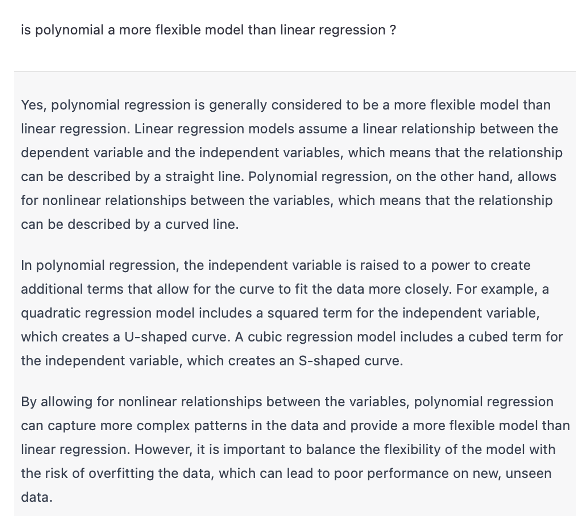

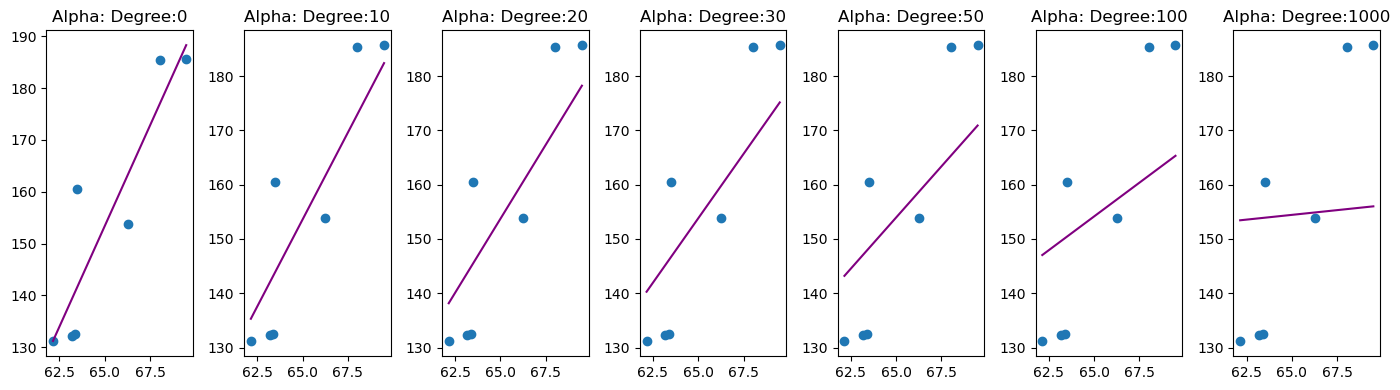

In [17]:
fig, ax = plt.subplots(1,7,figsize=(14,4))
for x, alpha in enumerate([0,10,20,30,50,100,1000]):
    model = Ridge(alpha=alpha).fit(xtrain, ytrain)
    ax[x].scatter(xtrain, ytrain)
    
    ypred = model.predict(xtrain)
    ax[x].plot(xtrain, ypred,color='purple')
    title_text = 'Alpha: Degree:'+str(alpha)
    ax[x].set_title(title_text)
    
plt.tight_layout()

* Above we can see that when we apply ridge regression with higher alphas, the slope tends to decrease and eventually moves toward zero due to the penalty factor
* The slope is getting flatter which tells u it is lowering the variance of model(i.e can perform well on new unseen data) & might be a little better at prediction also. But can't use a v.high value of alpha also cz effect has almost nullified i.e u r just getting almost straight horizaontal line.
* Ideally we don't penalize single column (just go for linear regression, no regularization needed).
* **We perform regularization when we have multiple cols, that's where real significance of ridge comes out** 

# Lasso Regression

/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_8666/558270813.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=alpha).fit(xtrain, ytrain)
/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.9063709697732, tolerance: 0.34875789448654704
  model = cd_fast.enet_coordinate_descent(


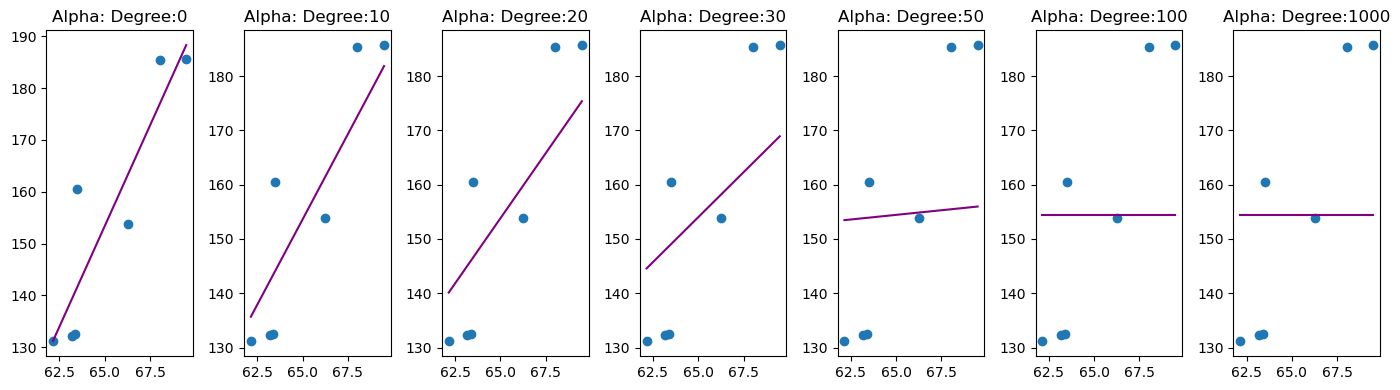

In [18]:
fig, ax = plt.subplots(1,7, figsize=(14,4))

for x, alpha in enumerate([0,10,20,30,50,100,1000]):
    model = Lasso(alpha=alpha).fit(xtrain, ytrain)
    ax[x].scatter(xtrain,ytrain)
    
    ypred = model.predict(xtrain)
    
    ax[x].plot(xtrain, ypred,color='purple')
    title_text = 'Alpha: Degree:'+str(alpha)
    ax[x].set_title(title_text)
    
plt.tight_layout()

* When we apply **lasso regression**, it reduces the slope of our coef but it reduces the slope drastically compared to ridge regression i.e slope reaches zero with little increase in alpha values

* It implies that lasso makes insignificant coef to be zero with very less alpha values. It is useful for interpretability of the model but may make less precise estimates

## Difference b/w Lasso and Ridge
Ridge will not reach exact zero but Lasso does 

# Dataset

In [19]:
data = pd.read_csv('datasets/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [20]:
ohe = pd.get_dummies(data.drop(columns=['age','bmi','children', 'expenses']), drop_first=True)
ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [21]:
x = data.drop(columns='expenses')
ohe_x = pd.concat([x, ohe], axis=1)
ohe_x = ohe_x.drop(columns=['sex','smoker','region'])
y = data['expenses']

In [22]:
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_x, y, test_size=.2, random_state=1)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 8), (1070,), (268, 8), (268,))

# Calculate coefficients on multiple columns/parameters

# Lasso

In [24]:
df_coefs = pd.DataFrame({'parameters' : xtrain.columns})

In [25]:
print (df_coefs)

         parameters
0               age
1               bmi
2          children
3          sex_male
4        smoker_yes
5  region_northwest
6  region_southeast
7  region_southwest


In [26]:
for alpha in [10,50,100,200,500]:
    model = Lasso(alpha=alpha).fit(xtrain, ytrain)
    df_coefs['Slope_alpha_%d' % alpha] = model.coef_

In [27]:
df_coefs

,parameters,Slope_alpha_10,Slope_alpha_50,Slope_alpha_100,Slope_alpha_200,Slope_alpha_500
0,age,257.436915,257.471846,257.598068,257.047711,255.407376
1,bmi,319.445131,310.639038,301.492339,298.706911,290.366244
2,children,397.867459,364.704396,331.118710,258.640344,41.191056
3,sex_male,-195.270758,-13.328077,-0.000000,-0.000000,-0.000000
4,smoker_yes,23720.270956,23451.149909,23128.575647,22511.679391,20661.048612
5,region_northwest,-229.449964,0.000000,0.000000,0.000000,0.000000
6,region_southeast,-867.100886,-396.841277,-0.618119,-0.000000,-0.000000
7,region_southwest,-734.663631,-282.421032,-0.000000,-0.000000,-0.000000


<font color=blue> Above results carry zero values for multiple columns with the increase in alpha values due to **lasso regression** which displays that the model discards insignificant cols 

# Ridge

In ridge regression even if u r using very high values of tuning parameter alpha/lambda to regularize your model ( i.e. to control the values of the coefficients), the values of all coefficients still remain although magnitute of values will be lower, ridge still good for prediction, but in case of lasso coefficients values become 0 for non-significant predictors hence better suited in terms of interpretation.

In [28]:
for alpha in [10,50,100,200,500]:
    model = Ridge(alpha=alpha).fit(xtrain, ytrain)
    df_coefs['Slope_alpha_%d' % alpha] = model.coef_

In [29]:
df_coefs

,parameters,Slope_alpha_10,Slope_alpha_50,Slope_alpha_100,Slope_alpha_200,Slope_alpha_500
0,age,256.958490,255.322150,253.870886,252.013009,249.458186
1,bmi,318.755505,311.001145,305.846363,300.967341,296.171017
2,children,396.562578,360.792443,329.560731,288.172243,222.639424
3,sex_male,-157.444774,67.356701,206.287313,301.603427,287.924710
4,smoker_yes,22486.537862,18457.893563,15084.679245,11051.252219,6136.483539
5,region_northwest,-331.354952,-208.988583,-156.267340,-118.126362,-78.158084
6,region_southeast,-881.481988,-502.171264,-275.248976,-86.334707,34.077909
7,region_southwest,-813.378790,-615.113885,-497.389953,-378.229592,-231.516684


<font color=blue> Above results shows that the values in insignificant cols are very small but no column approached zero upon increment in alpha values in ridge regression

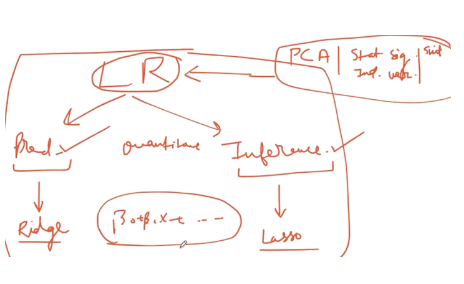

- If you have 100 predictors, you can do PCA, statistical significance, multicollinearity tests etc , pick 20 most important predictors and then apply linear regression.
- Another thing is if u know Ridge u can compare which is better at prediction accuracy either linear regression with pre-processing or ridge directly.
- If u r interested in Interpretability, Lasso will be a better choice cz it will remove insignificant features from model completely at the cost of a little less prediction accuracy.